In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

plt.style.use('seaborn')
np.random.seed(2020)

In [2]:
def prams_init():
    mu1, delta1, mu2, delta2 = np.random.randint(1, 50, 4)
    w1 = np.round(np.random.random(1)[0], 3) # 保留三位小数
    w2 = 1 - w1
    return mu1, delta1, mu2, delta2, w1, w2

In [3]:
# 生成一维高斯
mu_a, delta_a, mu_b, delta_b, alpha_a, alpha_b = prams_init()
print(mu_a, delta_a, mu_b, delta_b, alpha_a, alpha_b)

33 9 4 4 0.22 0.78


In [4]:
gaussian_a = np.random.normal(mu_a, delta_a, int(100000 * alpha_a))
gaussian_b = np.random.normal(mu_b, delta_b, int(100000 * alpha_b))
gaussian_mixture = np.concatenate((gaussian_a, gaussian_b))

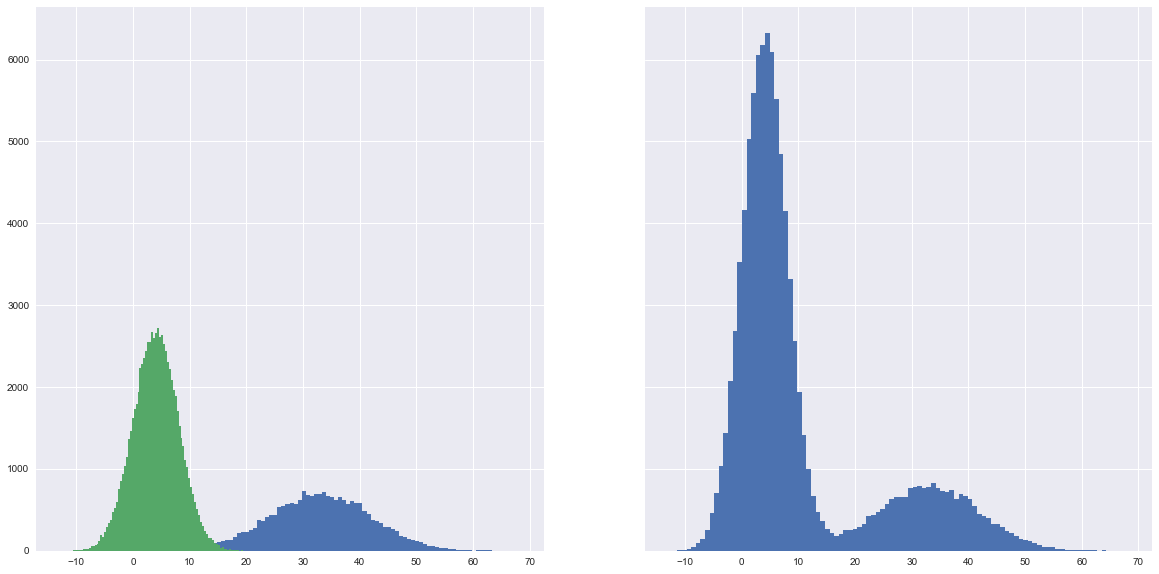

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10), sharey=True)
axes[0].hist(gaussian_a, bins=100)
axes[0].hist(gaussian_b, bins=100)
axes[1].hist(gaussian_mixture, bins=100)
plt.show()

In [6]:
def probability_density_function(x, mu, delta):
    """
    一维高斯的密度函数
    """
    return np.exp(-(x - mu) ** 2 / (2 * delta ** 2)) / (np.sqrt(2 * np.pi) * delta)

In [7]:
mu1, delta1, mu2, delta2, w1, w2 = prams_init()
w1 = w2 = 0.5
print(mu1, delta1, mu2, delta2, w1, w2)

for cnt in tqdm(range(10000)):
    """
    EM主体
    """
    # E-step:
    tmp1 = w1 * probability_density_function(gaussian_mixture, mu1, delta1)
    tmp2 = w2 * probability_density_function(gaussian_mixture, mu2, delta2)
    r_j1s = tmp1 / (tmp1 + tmp2)
    r_j2s = tmp2 / (tmp1 + tmp2)
    
    # M-step:
    mu1 = (r_j1s @ gaussian_mixture) / np.sum(r_j1s)
    mu2 = (r_j2s @ gaussian_mixture) / np.sum(r_j2s)
    delta1 = np.sqrt(r_j1s @ ((gaussian_mixture - mu1) ** 2) / np.sum(r_j1s))
    delta2 = np.sqrt(r_j2s @ ((gaussian_mixture - mu2) ** 2) / np.sum(r_j2s))
    w1 = np.sum(r_j1s) / gaussian_mixture.shape[0]
    w2 = np.sum(r_j2s) / gaussian_mixture.shape[0]

30 4 4 14 0.5 0.5


In [8]:
# 真实的参数
mu_a, delta_a, mu_b, delta_b, alpha_a, alpha_b

(33, 9, 4, 4, 0.22, 0.78)

In [9]:
# 估计的参数
mu1, delta1, mu2, delta2, w1, w2

(33.01064125144592,
 8.948048702707993,
 4.015731789718696,
 4.009363570410087,
 0.21955453076131717,
 0.780445469238683)

EM算法求解GMM模型的参数时,对参数的初值十分敏感,不同的初值,最后达到的收敛效果也不尽相同.

二维高斯混合模型参照http://sofasofa.io/tutorials/gmm_em/